Basics of `scikit-image`
====

In [100]:
from skimage import data
from skimage import img_as_float
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import io
from skimage.external import tifffile
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage.exposure import rescale_intensity, equalize_hist, equalize_adapthist

import warnings

from math import sqrt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

## Load image

In [2]:
image = tifffile.imread('data/2015-09-21_AB_20x_LMH-15-D007-RLL-10B1-10_003.tif')

In [3]:
image.dtype

dtype('uint16')

### Matpotlib does not know how to interpret 16 bit images

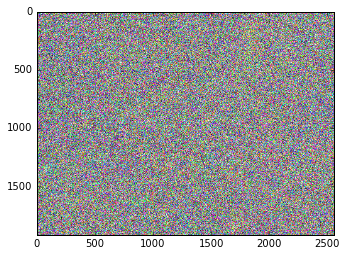

In [4]:
plt.imshow(image)
pass

### A simple fix is to convert to floating point

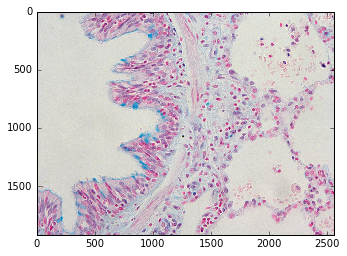

In [11]:
plt.imshow(img_as_float(image))
pass

### We can work with grayscale images

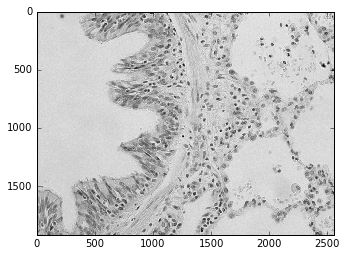

In [6]:
image_gray = rgb2gray(image)
plt.imshow(image_gray, cmap='gray')
pass

### We can also extract the red, green,  and blue channels

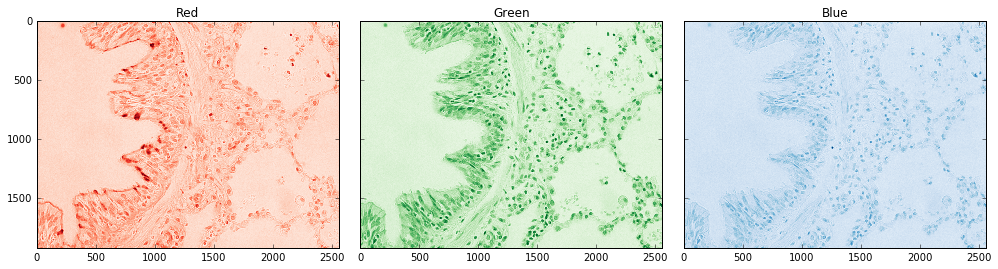

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

titles = ['Red', 'Green', 'Blue']
cmaps = ['Reds_r', 'Greens_r', 'Blues_r']
for i in range(3):
    img = image[:,:,i]
    axes[i].set_title(titles[i])
    axes[i].imshow(img, cmap=cmaps[i])
plt.tight_layout()

## Image coordinates

In [12]:
img = rgb2gray(image)
img.shape

(1920, 2560)

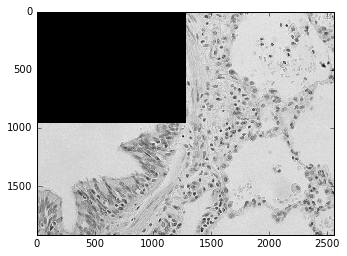

In [16]:
img = rgb2gray(image)
h, w = img.shape
img[0:h//2, 0:w//2] = 0
plt.imshow(img, cmap='gray')
pass

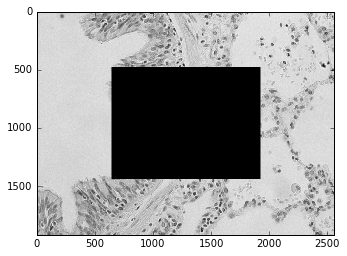

In [17]:
img = rgb2gray(image)
h, w = img.shape
img[h//4:(3*h)//4, w//4:(3*w)//4] = 0
plt.imshow(img, cmap='gray')
pass

### Extracting a sub-image

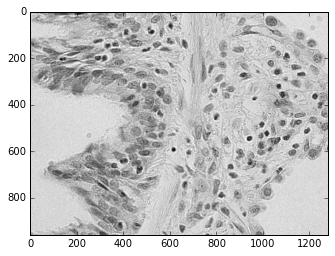

In [18]:
img = rgb2gray(image)
h, w = img.shape
img2 = img[h//4:(3*h)//4, w//4:(3*w)//4]
plt.imshow(img2, cmap='gray')
pass

### Putting some color back in

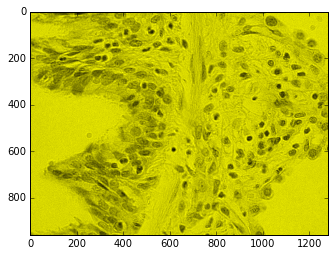

In [50]:
img2a = gray2rgb(img2)
plt.imshow([1,1,0] * img2a)
pass

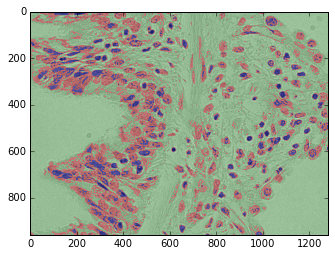

In [90]:
labels = np.zeros_like(img2, dtype='int')
labels[img2 > 0.5] = 1
labels[img2 > 0.7] = 2
img2b = label2rgb(labels, img2, colors=['blue', 'red', 'green'])
plt.imshow(img2b)
pass

### Again, but in color

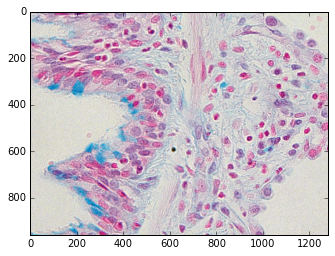

In [22]:
img = img_as_float(image)
h, w, c = img.shape
img3 = img[h//4:(3*h)//4, w//4:(3*w)//4]
plt.imshow(img3)
pass

### Boolean masks

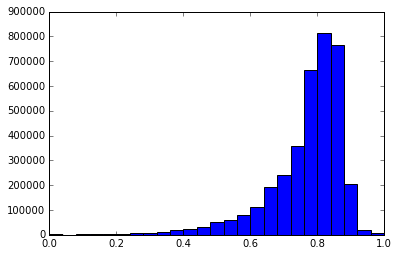

In [36]:
plt.hist(img3.ravel(), 25)
pass

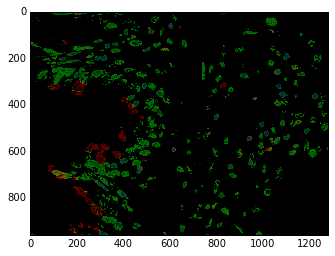

In [37]:
img = img3.copy()
mask = img > 0.5
img[mask] = 0
plt.imshow(img)
pass

### Adjusting contrast

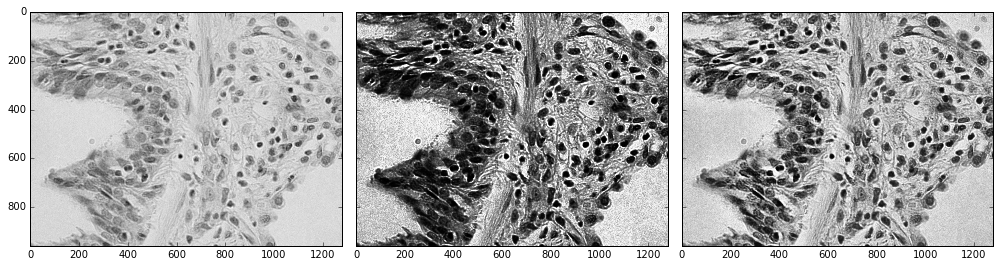

In [109]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    img2a = equalize_hist(img2)
    img2b = equalize_adapthist(img2)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(img2, cmap='gray')
axes[1].imshow(img2a, cmap='gray')
axes[2].imshow(img2b, cmap='gray')
plt.tight_layout()
pass

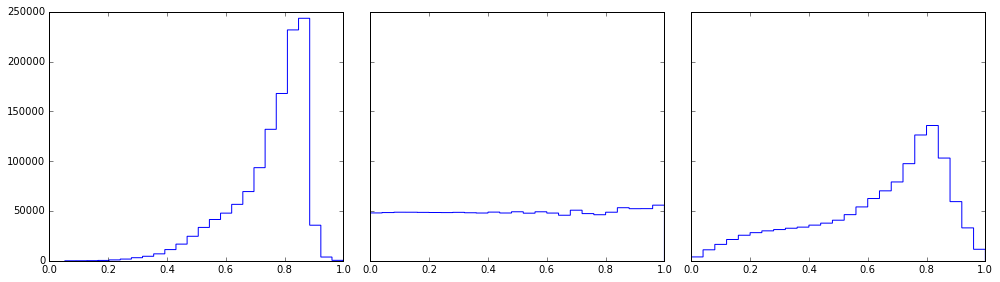

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].hist(img2.ravel(), 25, histtype='step')
axes[1].hist(img2a.ravel(), 25, histtype='step')
axes[2].hist(img2b.ravel(), 25, histtype='step')
plt.tight_layout()
pass